# 🌤️ Klasifikasi Prakiraan Cuaca


In [1]:

import numpy as np
import pandas as pd                            

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split            
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler,  StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression               
from sklearn.ensemble import RandomForestClassifier                   


from sklearn.pipeline import Pipeline
from sklearn.base import clone
import time

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


## **Loading Data**

In [2]:
df_cuaca = pd.read_csv('dpc.csv',header=0)

df_cuaca.head()  

,Suhu (°C),Kelembapan (%),Tekanan (hPa),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Kelembapan Tanah (%),pH Tanah,Prakiraan Cuaca
0,25.71,96.1,959.4,14.1,28.86,57.7,333.0,252.9,31.2,6.44,Hujan
1,32.25,51.7,988.1,22.5,17.44,26.6,104.2,104.3,14.0,4.07,Cerah
2,26.94,89.7,975.6,27.1,35.94,NaN,288.2,301.9,40.0,4.04,Hujan
3,25.34,76.0,983.1,15.3,25.56,18.4,729.5,19.2,31.7,6.24,Hujan
4,34.25,46.7,959.8,3.9,0.21,27.3,487.5,223.3,59.0,6.68,Cerah


In [3]:
print("Jumlah baris, kolom:", df_cuaca.shape)  
print("\nTipe data:")
print(df_cuaca.dtypes)

Jumlah baris, kolom: (800, 11)

Tipe data:
Suhu (°C)                   float64
Kelembapan (%)              float64
Tekanan (hPa)               float64
Kecepatan Angin (km/jam)    float64
Curah Hujan (mm)            float64
Awan (%)                    float64
Radiasi Matahari (W/m²)     float64
Ketinggian (mdpl)           float64
Kelembapan Tanah (%)        float64
pH Tanah                    float64
Prakiraan Cuaca              object
dtype: object


In [4]:
df_cuaca = df_cuaca.drop(columns=['Tekanan (hPa)', 'pH Tanah', 'Kelembapan Tanah (%)'], errors='ignore')

# Tampilkan 5 baris pertama untuk verifikasi
df_cuaca.head()

,Suhu (°C),Kelembapan (%),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Prakiraan Cuaca
0,25.71,96.1,14.1,28.86,57.7,333.0,252.9,Hujan
1,32.25,51.7,22.5,17.44,26.6,104.2,104.3,Cerah
2,26.94,89.7,27.1,35.94,NaN,288.2,301.9,Hujan
3,25.34,76.0,15.3,25.56,18.4,729.5,19.2,Hujan
4,34.25,46.7,3.9,0.21,27.3,487.5,223.3,Cerah


## **Pembersihan Data & Tangani Missing Value & Nan**

In [5]:
# (1) Cek nilai NULL
print("\nJumlah nilai kosong (null) per kolom:\n", df_cuaca.isnull().sum())

# (2) Cek nilai NaN
nan_counts = df_cuaca.isna().sum()
print("\nJumlah nilai NaN per kolom:\n", nan_counts)



Jumlah nilai kosong (null) per kolom:
 Suhu (°C)                   40
Kelembapan (%)              40
Kecepatan Angin (km/jam)     0
Curah Hujan (mm)            40
Awan (%)                    40
Radiasi Matahari (W/m²)      0
Ketinggian (mdpl)            0
Prakiraan Cuaca              0
dtype: int64

Jumlah nilai NaN per kolom:
 Suhu (°C)                   40
Kelembapan (%)              40
Kecepatan Angin (km/jam)     0
Curah Hujan (mm)            40
Awan (%)                    40
Radiasi Matahari (W/m²)      0
Ketinggian (mdpl)            0
Prakiraan Cuaca              0
dtype: int64


In [6]:
median_suhu = df_cuaca['Suhu (°C)'].median()
median_awan = df_cuaca['Awan (%)'].median()

# Isi nilai NaN dengan median
df_cuaca['Suhu (°C)'] = df_cuaca['Suhu (°C)'].fillna(median_suhu)
df_cuaca['Awan (%)'] = df_cuaca['Awan (%)'].fillna(median_awan)
df_cuaca['Kelembapan (%)'] = df_cuaca['Kelembapan (%)'].fillna(median_awan)
df_cuaca['Curah Hujan (mm)'] = df_cuaca['Curah Hujan (mm)'].fillna(median_awan)

# Tampilkan hasil median
print("Median Suhu (°C):", median_suhu)
print("Median Awan (%):", median_awan)

# Cek kembali apakah masih ada NaN
print("\nJumlah nilai kosong setelah penanganan:")
print(df_cuaca.isnull().sum())

Median Suhu (°C): 27.43
Median Awan (%): 49.849999999999994

Jumlah nilai kosong setelah penanganan:
Suhu (°C)                   0
Kelembapan (%)              0
Kecepatan Angin (km/jam)    0
Curah Hujan (mm)            0
Awan (%)                    0
Radiasi Matahari (W/m²)     0
Ketinggian (mdpl)           0
Prakiraan Cuaca             0
dtype: int64


In [7]:
# Validasi ulang
print("\nSetelah imputasi, nilai kosong per kolom:\n", df_cuaca.isnull().sum())


Setelah imputasi, nilai kosong per kolom:
 Suhu (°C)                   0
Kelembapan (%)              0
Kecepatan Angin (km/jam)    0
Curah Hujan (mm)            0
Awan (%)                    0
Radiasi Matahari (W/m²)     0
Ketinggian (mdpl)           0
Prakiraan Cuaca             0
dtype: int64


## **Pembersihan Data Cek & Hapus Duplikat**

In [8]:
before = df_cuaca.shape
dupes = df_cuaca[df_cuaca.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_cuaca2 = df_cuaca.drop_duplicates(keep='first')
print("Bentuk data sebelum/sesudah hapus duplikat:", before, "->", df_cuaca.shape)


Jumlah baris duplikat (terhitung ganda): 0
Bentuk data sebelum/sesudah hapus duplikat: (800, 8) -> (800, 8)


## **Pembersihan Data Cek & Hapus Outlier**

In [9]:

# Deteksi OUTLIER dengan metode IQR 
df_cuaca3 = df_cuaca2.select_dtypes(include=[np.number])  
Q1 = df_cuaca3.quantile(0.25)
Q3 = df_cuaca3.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cuaca3 < (Q1 - 1.5 * IQR)) | (df_cuaca3 > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah baris yang terdeteksi memiliki outlier:", outliers.sum())

# Hapus baris yang memiliki outlier
df_cuaca_clean = df_cuaca2.loc[~outliers]
print("Ukuran Data Asli:", df_cuaca2.shape)
print("Ukuran Data Setelah Outlier Dihapus:", df_cuaca_clean.shape)
print("Jumlah baris yang dihapus:", outliers.sum())


Jumlah baris yang terdeteksi memiliki outlier: 0
Ukuran Data Asli: (800, 8)
Ukuran Data Setelah Outlier Dihapus: (800, 8)
Jumlah baris yang dihapus: 0


##  **Encode Label & Pisahkan Fitur–Target**


In [10]:
# ===============================
# Encode Label & Pisahkan Fitur–Target
# ===============================

# Hujan   → 0 (Cuaca Hujan)
# Cerah   → 1 (Cuaca Cerah)

# Mengubah label prakiraan cuaca dari huruf menjadi angka
df_cuaca2['Prakiraan Cuaca'] = df_cuaca2['Prakiraan Cuaca'].map({'Hujan': 0, 'Cerah': 1})

# Menentukan X sebagai fitur (semua kolom kecuali 'Prakiraan Cuaca')
X = df_cuaca2.drop(columns=['Prakiraan Cuaca'])

# Menentukan y sebagai target (kolom 'Prakiraan Cuaca')
y = df_cuaca2['Prakiraan Cuaca']

# Menampilkan 5 baris pertama dataframe setelah perubahan
df_cuaca2.head()


,Suhu (°C),Kelembapan (%),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Prakiraan Cuaca
0,25.71,96.1,14.1,28.86,57.70,333.0,252.9,0
1,32.25,51.7,22.5,17.44,26.60,104.2,104.3,1
2,26.94,89.7,27.1,35.94,49.85,288.2,301.9,0
3,25.34,76.0,15.3,25.56,18.40,729.5,19.2,0
4,34.25,46.7,3.9,0.21,27.30,487.5,223.3,1


## **Pembagian Data: Train/Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 45, stratify=y
)                                                           
print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)

Ukuran X_train, X_test: (560, 7) (240, 7)


##  **Membangun Model Gradient Boosting Classifiedengan Pipeline + GridSearchCV**

In [12]:
# ============================================================
#  PIPELINE: Scaling → Feature Selection → Gradient Boosting
# ============================================================

pipe_gb = Pipeline(steps=[
    ('scaling', MinMaxScaler()),              
    ('feat_select', SelectKBest()),           
    ('clf', GradientBoostingClassifier(
        random_state=42
    ))
])


params_grid_gb = [
    # Kandidat 1: SelectKBest
    {
        'feat_select__k': np.arange(5, 15),
        'clf__n_estimators': [50, 100, 150],      
        'clf__learning_rate': [0.001, 0.002, 0.01],   
        'clf__max_depth': [1, 2, 3],               
        'clf__min_samples_split': [10, 15, 20]
    },
]

# ------------------------------------------------------------
# 3️⃣ StratifiedKFold untuk menjaga proporsi kelas di setiap fold
# ------------------------------------------------------------
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------------
# 4️⃣ Jalankan GridSearchCV untuk mencari kombinasi terbaik
# ------------------------------------------------------------
gscv_gb = GridSearchCV(
    pipe_gb,
    params_grid_gb,
    cv=SKF,
    scoring='f1',           # gunakan F1 agar seimbang antara precision & recall
    verbose=1,
    n_jobs=-1
)

print("Menjalankan GridSearch untuk Gradient Boosting...")
start = time.time()

gscv_gb.fit(X_train, y_train)

print(f"GridSearch Gradient Boosting selesai dalam {time.time() - start:.2f} detik")

Menjalankan GridSearch untuk Gradient Boosting...
Fitting 5 folds for each of 810 candidates, totalling 4050 fits
GridSearch Gradient Boosting selesai dalam 123.63 detik


## EVALUASI 

CV Score (F1) terbaik: 0.9820856193341593

Kombinasi model terbaik:
 Pipeline(steps=[('scaling', MinMaxScaler()),
                ('feat_select', SelectKBest(k=np.int64(5))),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=1,
                                            min_samples_split=10,
                                            n_estimators=50,
                                            random_state=42))])

Skor Test (akurasi) Gradient Boosting: 0.9833333333333333

Fitur terbaik (terpilih): ['Suhu (°C)' 'Kecepatan Angin (km/jam)' 'Awan (%)'
 'Radiasi Matahari (W/m²)' 'Ketinggian (mdpl)']


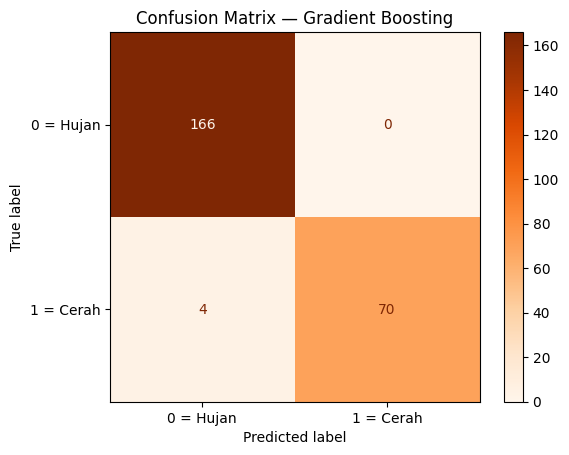


Classification Report — Gradient Boosting:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       166
           1       1.00      0.95      0.97        74

    accuracy                           0.98       240
   macro avg       0.99      0.97      0.98       240
weighted avg       0.98      0.98      0.98       240



In [13]:
# ------------------------------------------------------------
# 5️⃣ Evaluasi hasil GridSearch
# ------------------------------------------------------------
print("CV Score (F1) terbaik:", gscv_gb.best_score_)
print("\nKombinasi model terbaik:\n", gscv_gb.best_estimator_)

gb_test_score = gscv_gb.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) Gradient Boosting:", gb_test_score)

# ------------------------------------------------------------
# 6️⃣ Fitur terbaik (jika selector mendukung get_support)
# ------------------------------------------------------------
selector = gscv_gb.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# ------------------------------------------------------------
# 7️⃣ Confusion Matrix & Classification Report
# ------------------------------------------------------------
gb_pred = gscv_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, gb_pred)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['0 = Hujan','1 = Cerah'])
disp_gb.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix — Gradient Boosting")
plt.show()

print("\nClassification Report — Gradient Boosting:\n", classification_report(y_test, gb_pred))

##  **Membangun Model Support Vector Machine dengan Pipeline + GridSearchCV**

In [14]:
pipe_svm = Pipeline(steps=[
    ('scaling', MinMaxScaler()),              
    ('feat_select', SelectKBest()),           
    ('clf', SVC(
        class_weight='balanced',   # menyeimbangkan kelas minoritas
        probability=True,          # agar bisa menghitung probabilitas prediksi
        random_state=42
    ))
])

# ------------------------------------------------------------
# 2️⃣ GridSearch: kombinasi parameter seleksi fitur & model
# ------------------------------------------------------------
params_grid_svm = [
    # Kandidat 1: SelectKBest
    {
        'feat_select__k': np.arange(5, 15),
        'clf__C': [0.1, 1, 10, 100],             # regularisasi
        'clf__kernel': ['linear', 'rbf', 'poly'],# jenis kernel
        'clf__gamma': ['scale', 'auto']          # parameter kernel RBF/poly
    },
    # Kandidat 2: SelectPercentile
    {
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(30, 80, 10),
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf', 'poly'],
        'clf__gamma': ['scale', 'auto']
    }
]

# ------------------------------------------------------------
# 3️⃣ StratifiedKFold untuk validasi berstrata
# ------------------------------------------------------------
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------------------------------------
# 4️⃣ Jalankan GridSearchCV
# ------------------------------------------------------------
gscv_svm = GridSearchCV(
    pipe_svm,
    params_grid_svm,
    cv=SKF,
    scoring='f1',           
    verbose=1,
    n_jobs=-1
)

print("Menjalankan GridSearch untuk Support Vector Machine...")
start = time.time()

gscv_svm.fit(X_train, y_train)

print(f"GridSearch SVM selesai dalam {time.time() - start:.2f} detik")

Menjalankan GridSearch untuk Support Vector Machine...
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
GridSearch SVM selesai dalam 16.08 detik


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



## EVALUASI

CV Score (F1) terbaik: 0.9577825415018915

Kombinasi model terbaik:
 Pipeline(steps=[('scaling', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=np.int64(30))),
                ('clf',
                 SVC(C=10, class_weight='balanced', kernel='poly',
                     probability=True, random_state=42))])

Skor Test (akurasi) SVM: 0.9708333333333333

Fitur terbaik (terpilih): ['Suhu (°C)' 'Awan (%)']


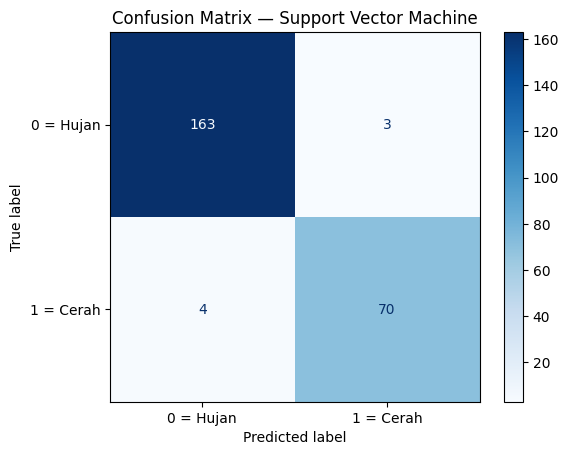


Classification Report — Support Vector Machine:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       166
           1       0.96      0.95      0.95        74

    accuracy                           0.97       240
   macro avg       0.97      0.96      0.97       240
weighted avg       0.97      0.97      0.97       240



In [15]:
# ------------------------------------------------------------
# 5️⃣ Evaluasi hasil GridSearch
# ------------------------------------------------------------
print("CV Score (F1) terbaik:", gscv_svm.best_score_)
print("\nKombinasi model terbaik:\n", gscv_svm.best_estimator_)

svm_test_score = gscv_svm.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) SVM:", svm_test_score)

# ------------------------------------------------------------
# 6️⃣ Fitur terbaik (jika selector mendukung get_support)
# ------------------------------------------------------------
selector = gscv_svm.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# ------------------------------------------------------------
# 7️⃣ Confusion Matrix & Classification Report
# ------------------------------------------------------------
svm_pred = gscv_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['0 = Hujan','1 = Cerah'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()

print("\nClassification Report — Support Vector Machine:\n", classification_report(y_test, svm_pred))

## **Langkah Akhir — Visualisasi Perbandingan dua Model Terbaik**

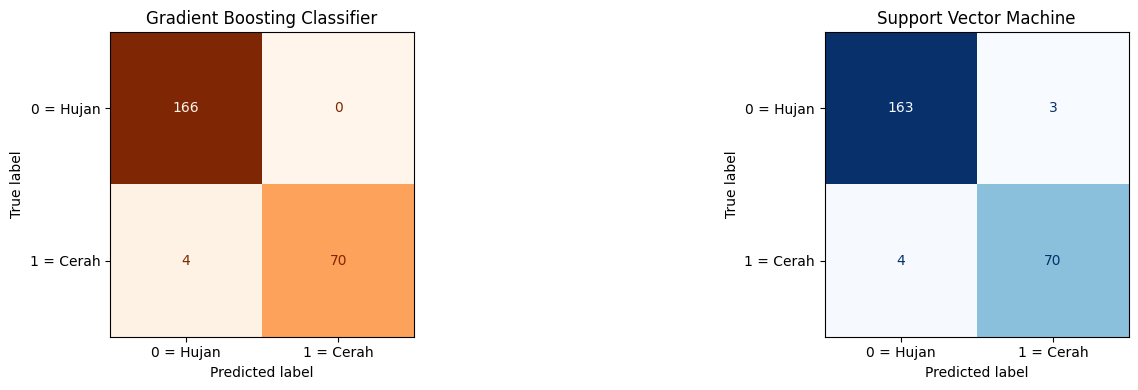

In [16]:
# Buat figure dengan 2 subplot berdampingan (1 baris, 3 kolom)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Plot Confusion Matrix untuk Logistic Regression
disp_gb.plot(ax=ax1, cmap=plt.cm.Oranges, colorbar=False)
ax1.set_title("Gradient Boosting Classifier")   # judul subplot pertama

# Plot Confusion Matrix untuk Random Forest
disp_svm.plot(ax=ax2, cmap=plt.cm.Blues, colorbar=False)
ax2.set_title("Support Vector Machine") # judul subplot ketiga

# Rapikan tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()  # tampilkan semua plot



In [17]:
import pickle                                 

# Ambil model terbaik dari hasil GridSearchCV
best_gb_model = gscv_gb.best_estimator_.named_steps['clf']

# Simpan model terbaik ke file pickle
with open("BestModel_CLF_GradientBoost_pingouin.pkl", "wb") as f:   
    pickle.dump(best_gb_model, f)

print("✅ Model Gradient Boosting terbaik berhasil disimpan ke 'BestModel_CLF_GradientBoost_pingouin.pkl'")


✅ Model Gradient Boosting terbaik berhasil disimpan ke 'BestModel_CLF_GradientBoost_pingouin.pkl'
